In [1]:
# import plotly.express as px
# about()
from genobs.lib import *

In [2]:
h = H_atom_field_D1(-1, E_0_plus(10)) + H_atom(0, "D1")
h

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[-2.68397359e+10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.01490604e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.01490604e+06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.68397359e+10  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.01490604e+06  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -5.22197044e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.68397359e+10  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.38498141e+06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.61038415e+10
   0.00000000e+00  0.00000000e+00  0.00000000

In [3]:
decays = natural_decay_ops_D1() + wall_coll(line="D1") + quenching_ops("D1")

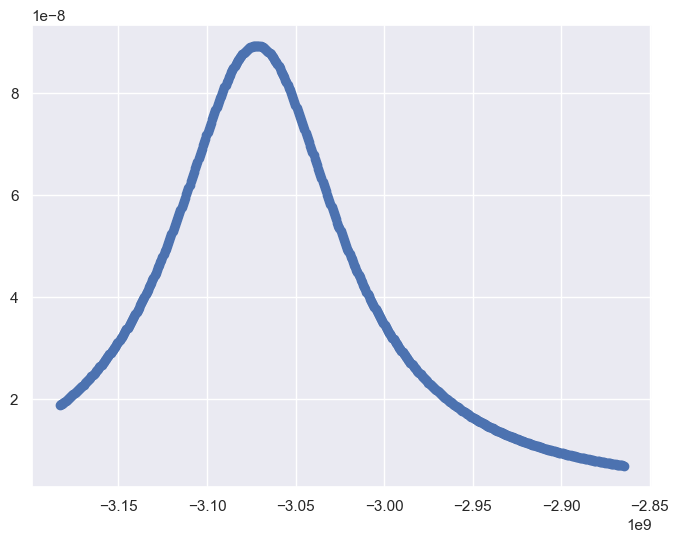

In [4]:
freqs = np.linspace(-2e10, -1.8e10, 501)
rho_ss_list = [steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(det, "D1"), c_op_list=decays) for det in freqs]
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
plt.plot(freqs/(2*pi), excited_pops, "o")

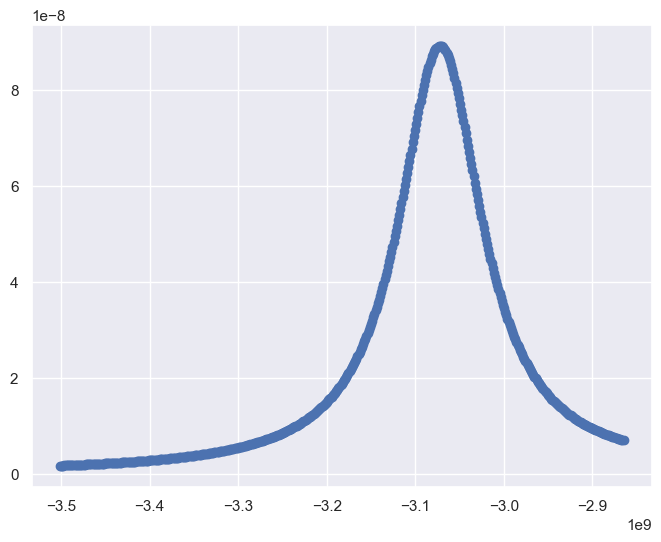

In [5]:
freqs = np.linspace(-2.2e10, -1.8e10, 501)
rho_ss_list = [steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(det, "D1"), c_op_list=decays) for det in freqs]
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
plt.figure()
plt.plot(freqs/(2*pi), excited_pops, "o")

# # %%
# freqs = np.linspace(-2.3e10, 3.2e10, 501)
# rho_ss_list = [steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(det, "D1"), c_op_list=decays) for det in freqs]
# excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
# plt.figure()
# plt.plot(freqs/(2*pi), excited_pops, "o")

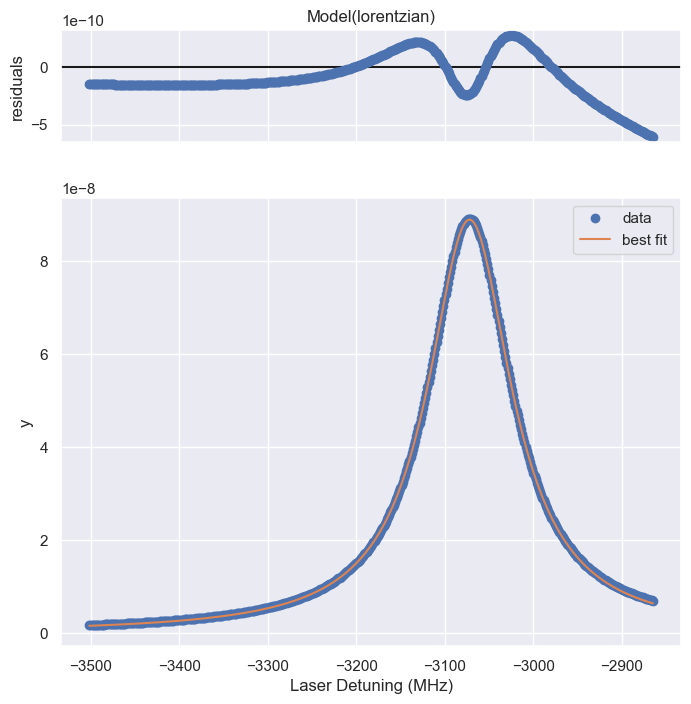

In [6]:
from lmfit.models import LorentzianModel, ConstantModel
mod = LorentzianModel() #+ ConstantModel()
pars = mod.make_params(amplitude=10e-4, sigma=3, center=-3.05e3)
res = mod.fit(data=excited_pops, params=pars, x=freqs/(2e6*pi))
res.plot();
plt.xlabel("Laser Detuning (MHz)")
res

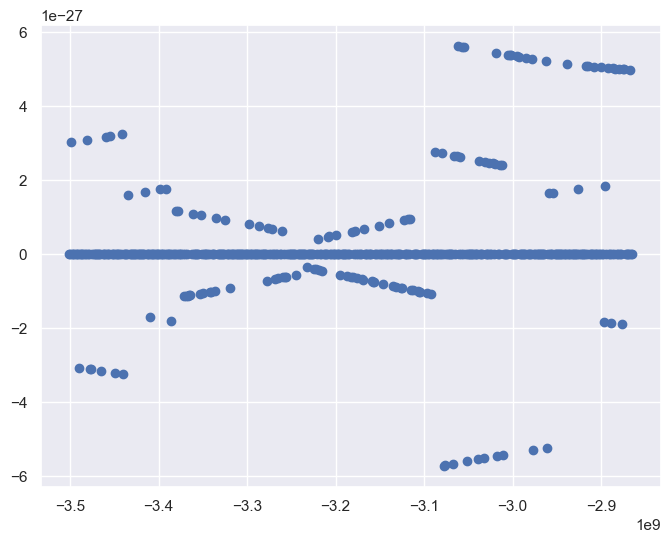

In [7]:
decays = natural_decay_ops_D1() #+ wall_coll(line="D1") + quenching_ops("D1")
freqs = np.linspace(-2.2e10, -1.8e10, 501)
rho_ss_list = [steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(det, "D1"), c_op_list=decays) for det in freqs]
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
plt.figure()
plt.plot(freqs/(2*pi), excited_pops, "o")

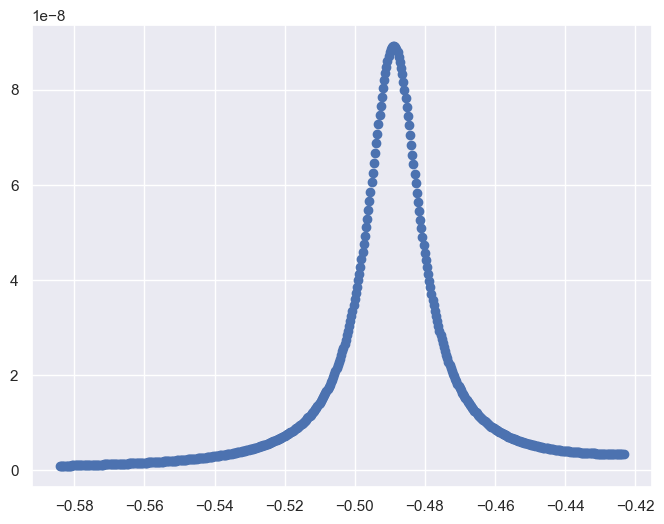

In [8]:
decays = natural_decay_ops_D1() + quenching_ops("D1", gamma=QUENCHING_RATE) + wall_coll("D1")
freqs = np.linspace(-3.67, -2.66, 500)
last_ss = 0
rho_ss_list = []
for freq in freqs:
    if last_ss==0:
        ss = steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), c_op_list=decays, method='iterative-gmres')
    else:
        ss = steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), c_op_list=decays, method='iterative-gmres', x0=operator_to_vector(last_ss))
    last_ss = ss
    rho_ss_list.append(ss)
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
plt.figure()
plt.plot(freqs/(2*pi), excited_pops, "o")

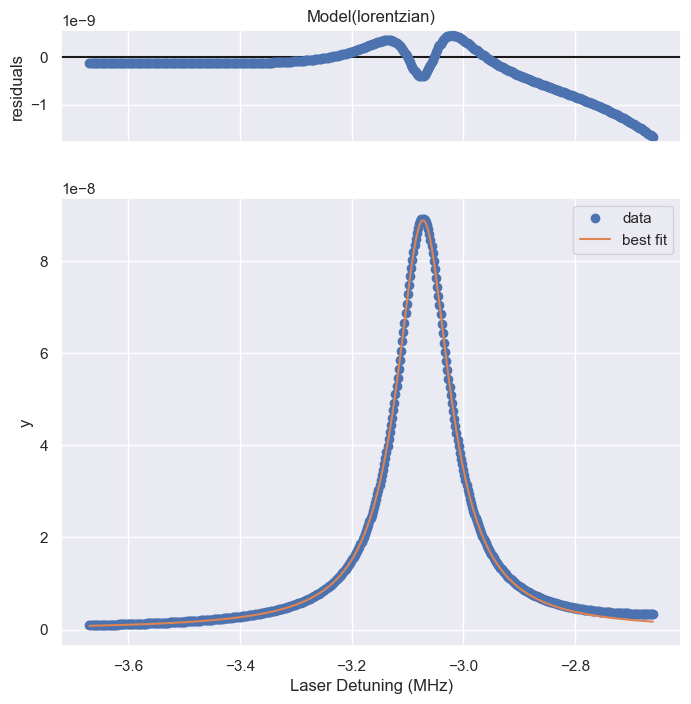

In [9]:
from lmfit.models import LorentzianModel, ConstantModel
mod = LorentzianModel() #+ ConstantModel()
pars = mod.make_params(amplitude=10e-4, sigma=0.013, center=-3.07)
res = mod.fit(data=excited_pops, params=pars, x=freqs)
res.plot();
plt.xlabel("Laser Detuning (MHz)")
res

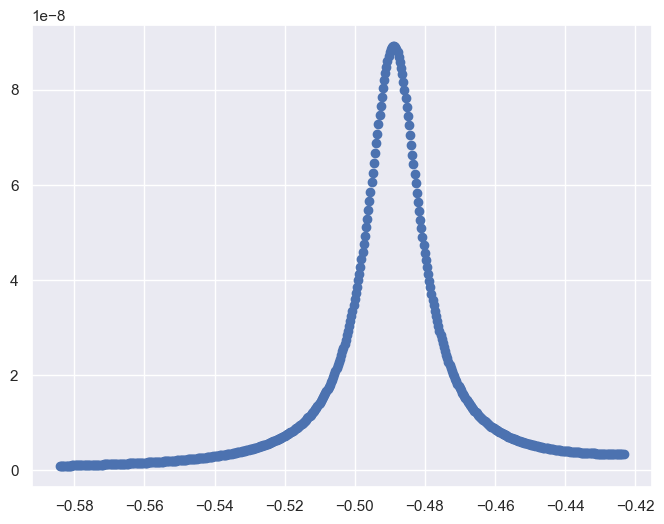

In [10]:
decays = natural_decay_ops_D1() + quenching_ops("D1", gamma=QUENCHING_RATE) + wall_coll("D1")
freqs = np.linspace(-3.67, -2.66, 500)
last_ss = 0
rho_ss_list = []
for freq in freqs:
    if last_ss==0:
        ss = steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), c_op_list=decays)
    else:
        ss = steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), c_op_list=decays, method='iterative-gmres', x0=operator_to_vector(last_ss))
    last_ss = ss
    rho_ss_list.append(ss)
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
plt.figure()
plt.plot(freqs/(2*pi), excited_pops, "o")

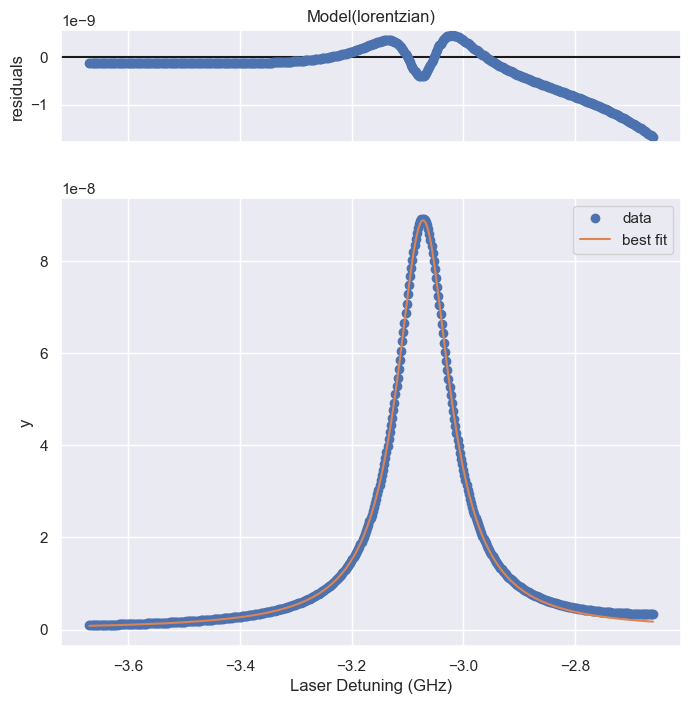

In [11]:
from lmfit.models import LorentzianModel, ConstantModel
mod = LorentzianModel() #+ ConstantModel()
pars = mod.make_params(amplitude=10e-4, sigma=0.013, center=-3.07)
res = mod.fit(data=excited_pops, params=pars, x=freqs)
res.plot();
plt.xlabel("Laser Detuning (GHz)")
res

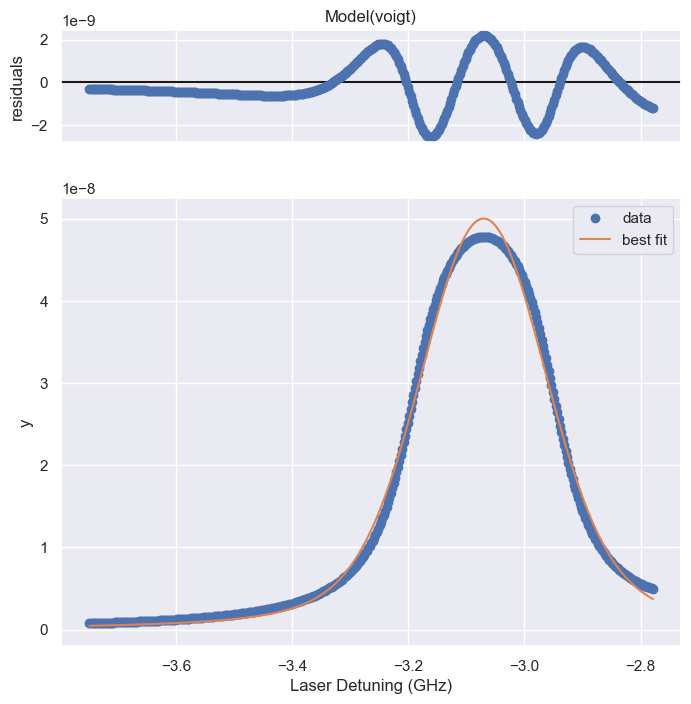

In [12]:
decays = natural_decay_ops_D1() + quenching_ops("D1", gamma=QUENCHING_RATE) + wall_coll("D1")
freqs = np.linspace(-3.87, -2.66, 500)
last_ss = 0
rho_ss_list = []
for freq in freqs:
    if last_ss==0:
        ss = steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), c_op_list=decays)
    else:
        ss = steadystate(
                H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), 
                c_op_list=decays, 
                method='iterative-gmres', 
                x0=operator_to_vector(last_ss)
            )
    last_ss = ss
    rho_ss_list.append(ss)
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
import pandas as pd
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(100, center=True, win_type='gaussian').mean(std=0.500/delta).dropna()

from lmfit.models import VoigtModel
mod = VoigtModel() #+ ConstantModel()
y = ser.dropna()
pars = mod.make_params(amplitude=10e-4, sigma=0.013, center=-3.07)
pars["gamma"].set(vary=True, value=0.013)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")
res

In [13]:
decays = natural_decay_ops_D1() + quenching_ops("D1", gamma=QUENCHING_RATE) + wall_coll("D1")
freqs = np.linspace(-6, 6, 1500)
last_ss = 0
rho_ss_list = []
for freq in freqs:
    if last_ss==0:
        ss = steadystate(H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), c_op_list=decays)
    else:
        ss = steadystate(
                H_atom_field_D1(-1, E_0_plus(0.01)) + H_atom(freq*2e9*pi, "D1"), 
                c_op_list=decays, 
                method='iterative-gmres', 
                x0=operator_to_vector(last_ss)
            )
    last_ss = ss
    rho_ss_list.append(ss)
excited_pops = [sum(rho.diag()[8:]) for rho in rho_ss_list]
import pandas as pd
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(100, center=True, win_type='gaussian').mean(std=0.500/delta).dropna()

In [14]:
y = ser.dropna()
from lmfit.models import VoigtModel
mod = VoigtModel(prefix="p1_")+VoigtModel(prefix="p2_")+VoigtModel(prefix="p3_")+VoigtModel(prefix="p4_") #+ ConstantModel()
pars = mod.make_params()
for par in pars.keys():
    
pars["gamma"].set(vary=True, value=0.013)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")
res

IndentationError: expected an indented block (<ipython-input-14-c87ed0775b6c>, line 8)

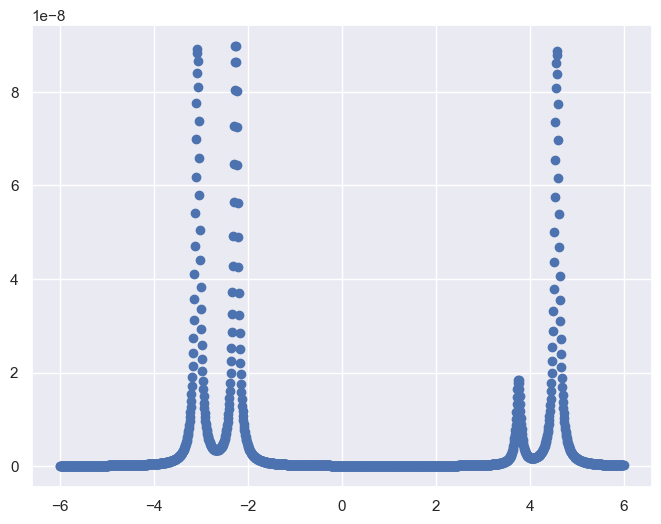

In [15]:
plt.figure()
plt.plot(freqs, excited_pops, "o")

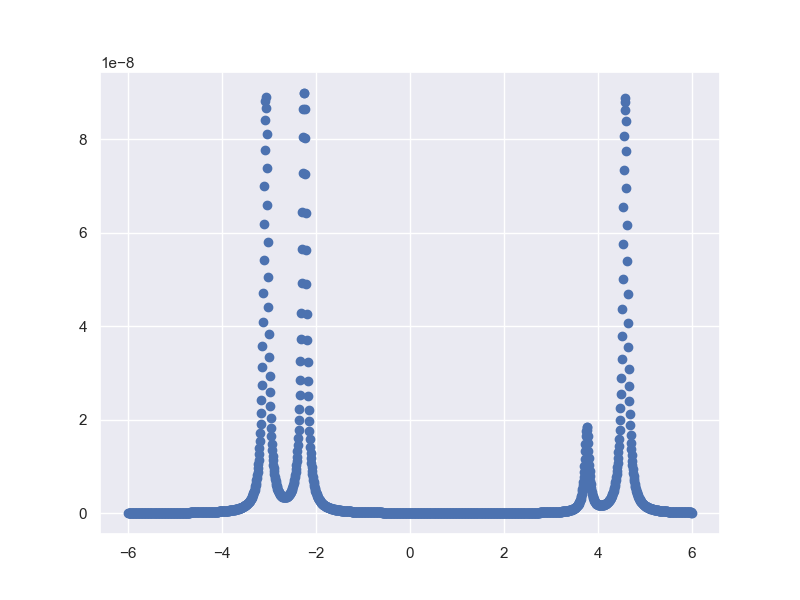

In [16]:
%matplotlib widget
plt.figure()
plt.plot(freqs, excited_pops, "o")

In [17]:
%matplotlib inline

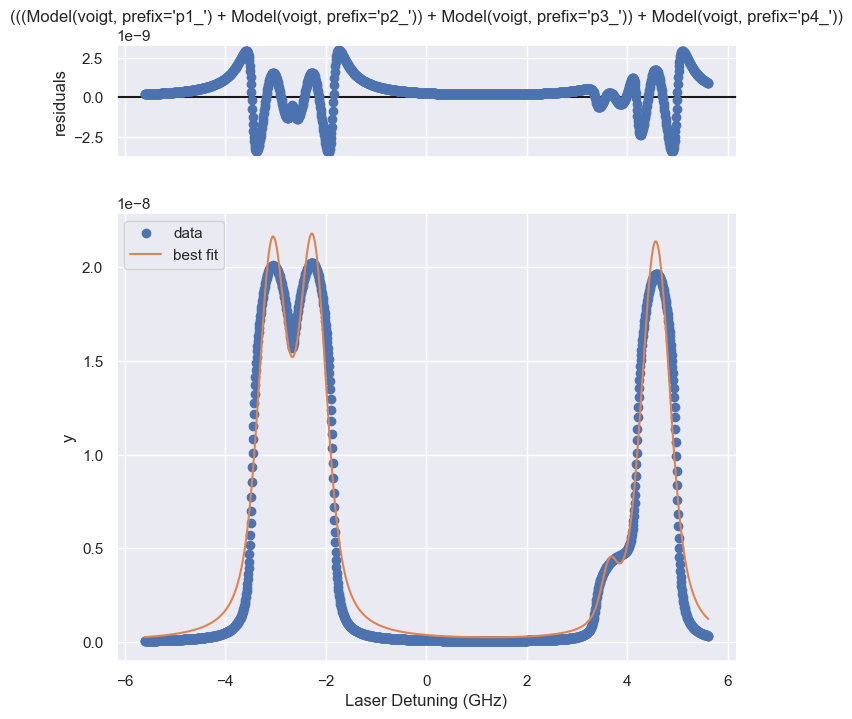

In [18]:
y = ser.dropna()
from lmfit.models import VoigtModel
mod = VoigtModel(prefix="p1_")+VoigtModel(prefix="p2_")+VoigtModel(prefix="p3_")+VoigtModel(prefix="p4_") #+ ConstantModel()
pars = mod.make_params()
for par in pars.keys():
    p = par.split("_")[1]
    if p=="amplitude":
        pars[par].set(value=1.6183e-08)
    elif p=="sigma":
        pars[par].set(value=0.05800174)
pars["p1_center"].set(value=-3.07192801)
pars["p2_center"].set(value=-2.21)
pars["p3_center"].set(value=3.77)
pars["p4_center"].set(value=4.6)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")
res

In [19]:
1


1

In [20]:
import copy

In [21]:
pars = copy.copy(res.params)

Text(0.5, 0, 'Laser Detuning (GHz)')

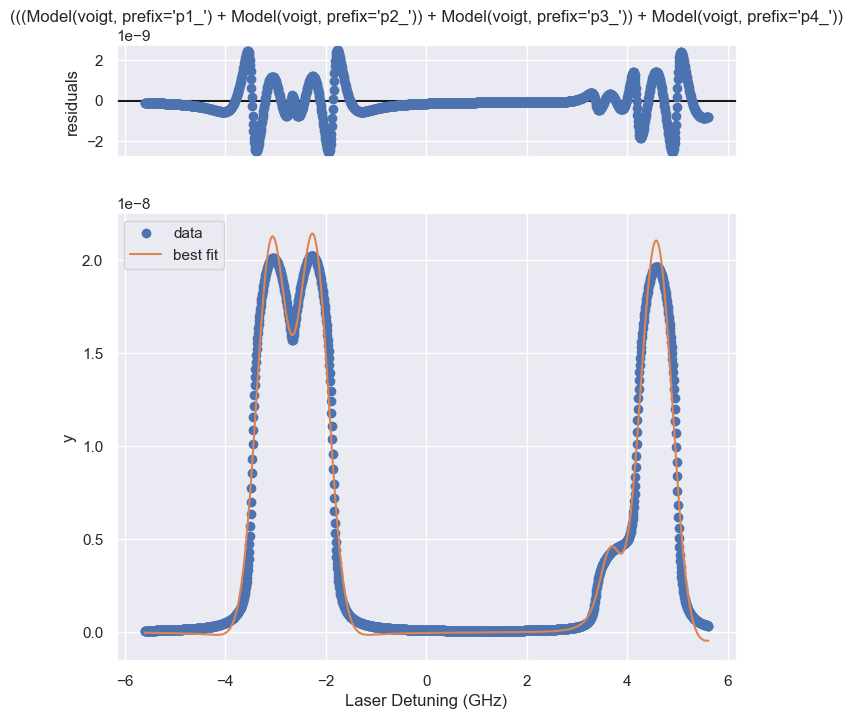

In [22]:
import copy
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res1.plot();
plt.xlabel("Laser Detuning (GHz)")

Text(0.5, 0, 'Laser Detuning (GHz)')

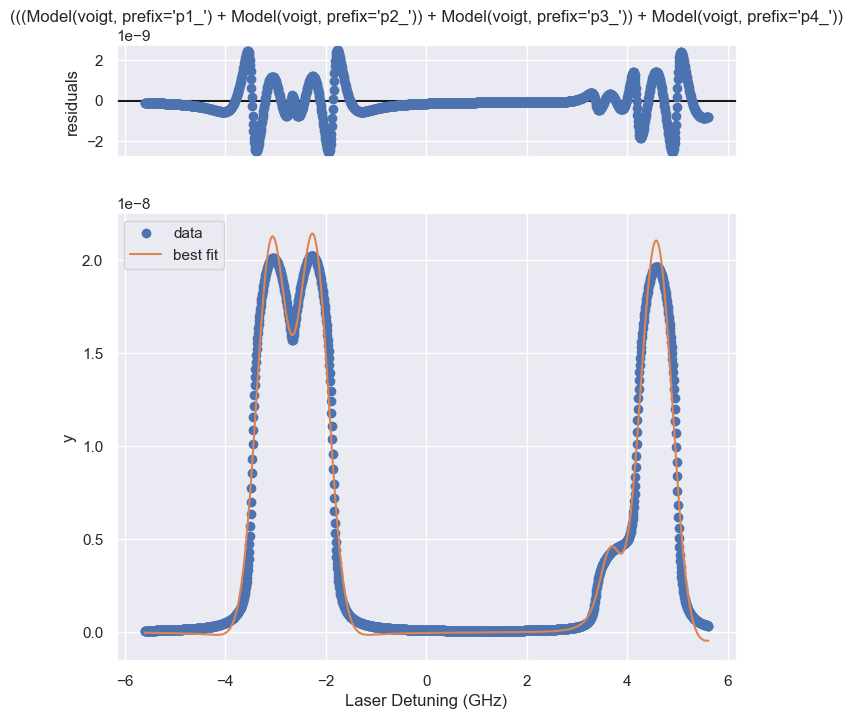

In [23]:
import copy
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res1.plot();
res1
plt.xlabel("Laser Detuning (GHz)")

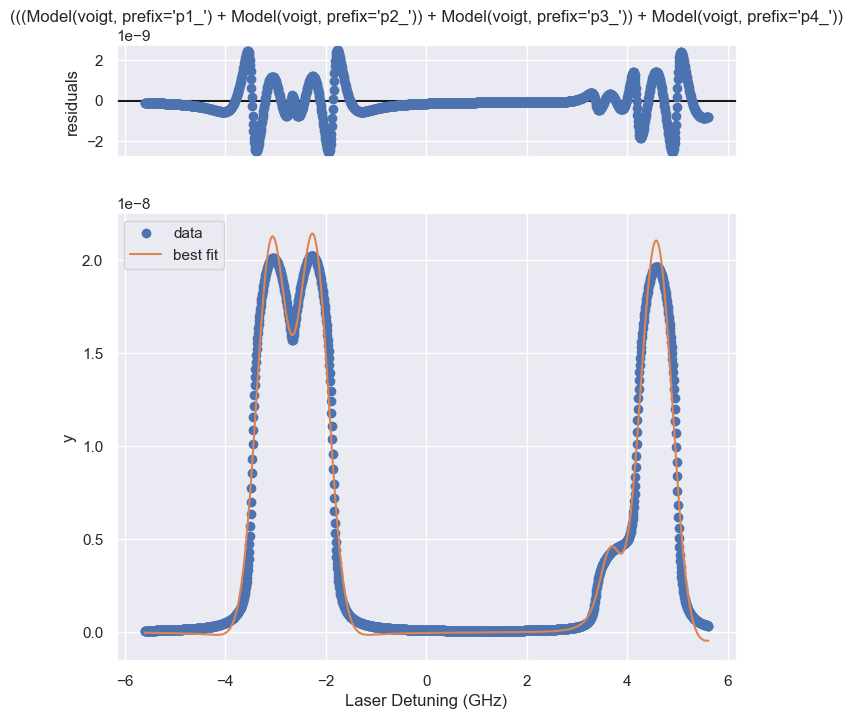

In [24]:
import copy
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res1.plot();
plt.xlabel("Laser Detuning (GHz)")
res1

In [25]:
1

1

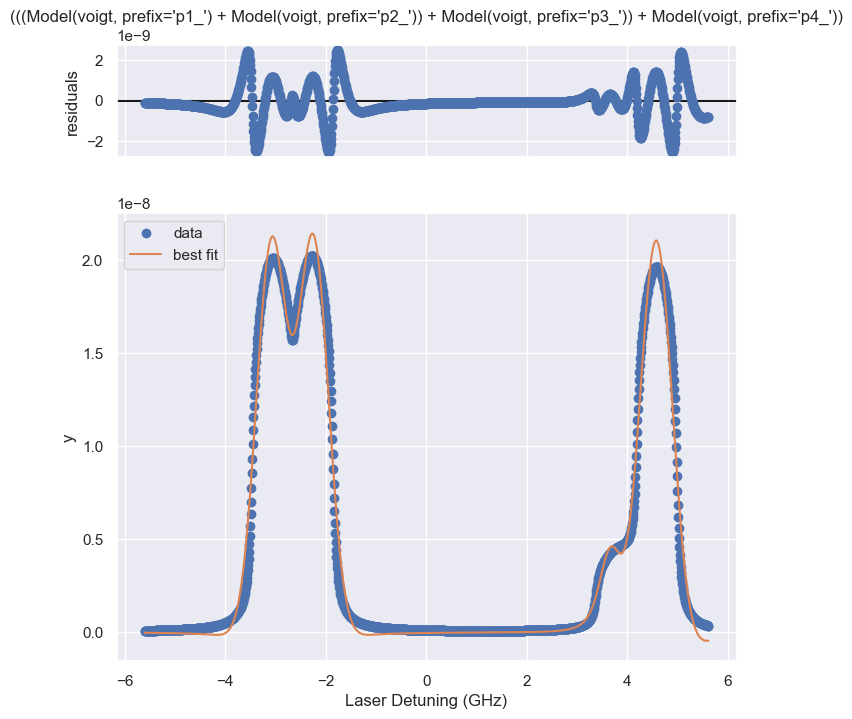

In [26]:
import copy
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy(), method="nelder")
res1.plot();
plt.xlabel("Laser Detuning (GHz)")
res1

In [27]:
1

1

c:\Users\m\anaconda3\envs\masterarbeit_python39\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
c:\Users\m\anaconda3\envs\masterarbeit_python39\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
c:\Users\m\anaconda3\envs\masterarbeit_python39\lib\site-packages\uncertainties\core.py:173: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


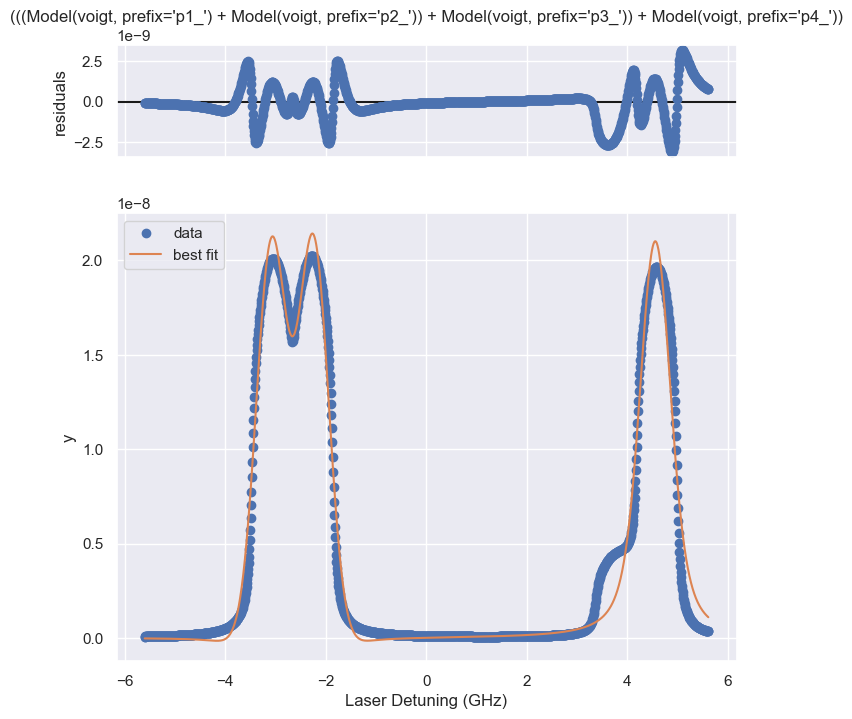

In [28]:
pars = copy.copy(res1.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True, value=1)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy(), method="nelder")
res1.plot();
plt.xlabel("Laser Detuning (GHz)")
res1

In [29]:
1

1

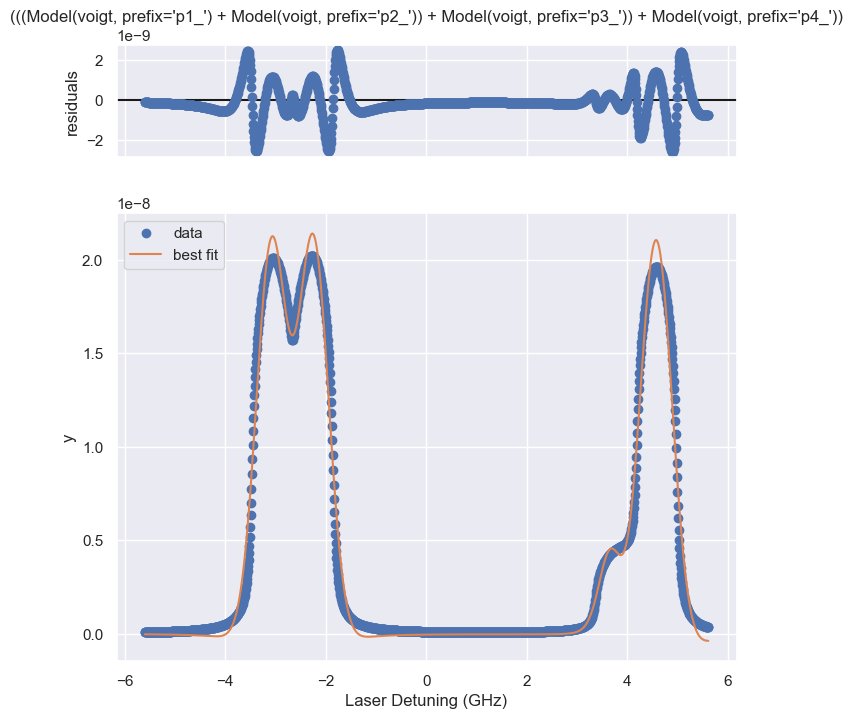

In [30]:
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True, value=0.1)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy(), method="nelder")
res1.plot();
plt.xlabel("Laser Detuning (GHz)")
res1

In [31]:
1

1

Text(0.5, 0, 'Laser Detuning (GHz)')

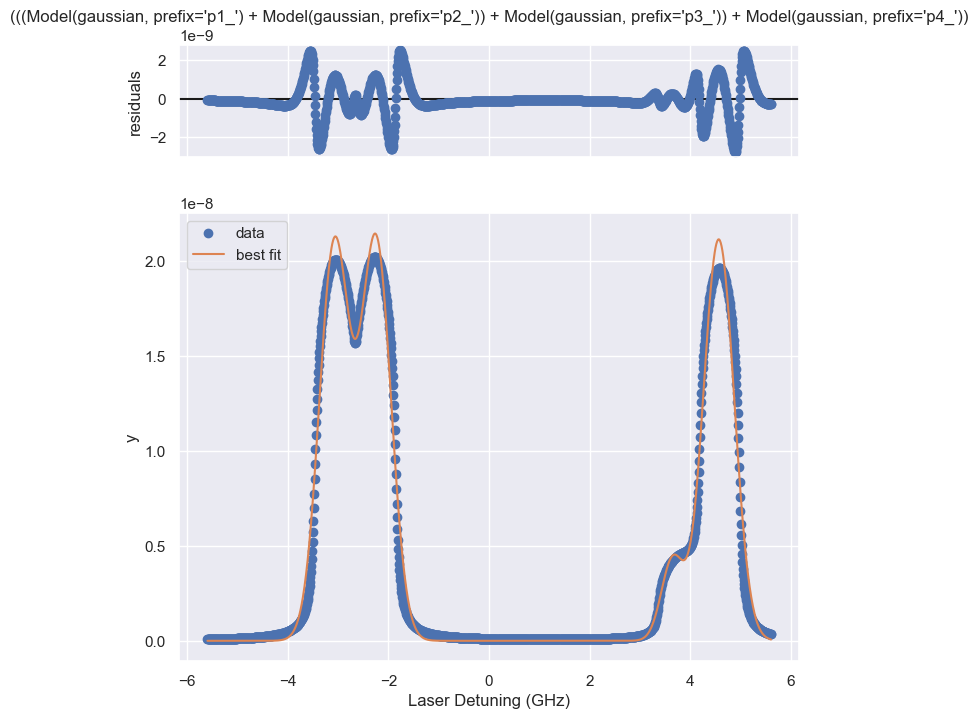

In [32]:
from lmfit.models import GaussianModel
mod = GaussianModel(prefix="p1_")+GaussianModel(prefix="p2_")+GaussianModel(prefix="p3_")+GaussianModel(prefix="p4_") #+ ConstantModel()
pars = mod.make_params()
for par in pars.keys():
    p = par.split("_")[1]
    if p=="amplitude":
        pars[par].set(value=1.6183e-08)
    elif p=="sigma":
        pars[par].set(value=0.5800174)
pars["p1_center"].set(value=-3.07192801)
pars["p2_center"].set(value=-2.21)
pars["p3_center"].set(value=3.77)
pars["p4_center"].set(value=4.6)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")

In [33]:
res

In [34]:
import scipy

In [35]:
plt.plot(scipy.signal.windows(100, 61))

TypeError: 'module' object is not callable

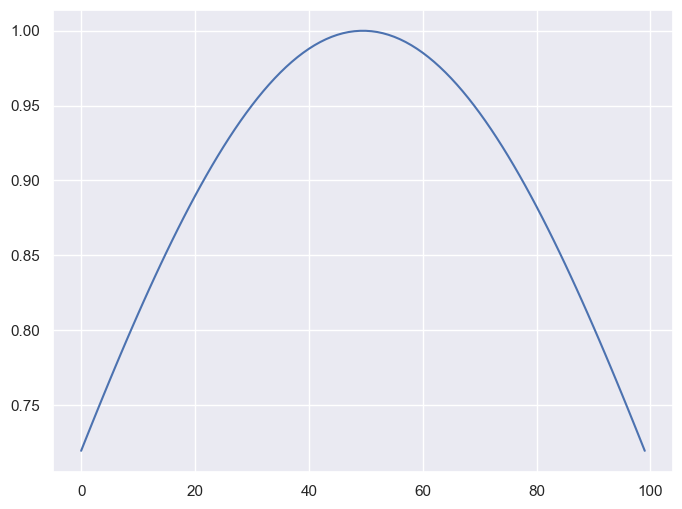

In [36]:
plt.plot(scipy.signal.windows.gaussian(100, 61))

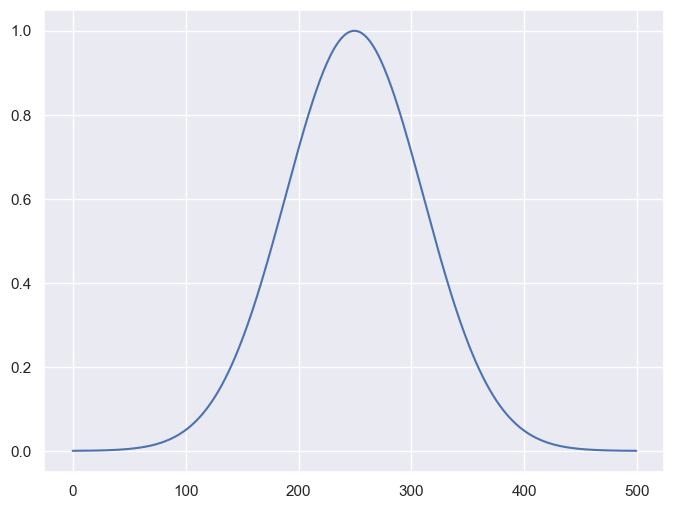

In [37]:
plt.plot(scipy.signal.windows.gaussian(500, 61))

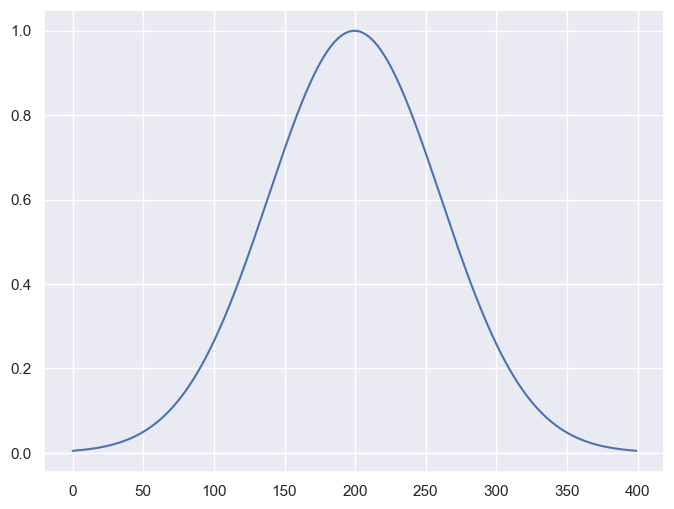

In [38]:
plt.plot(scipy.signal.windows.gaussian(400, 61))

In [39]:
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(400, center=True, win_type='gaussian').mean(std=0.500/delta).dropna()

<AxesSubplot: >

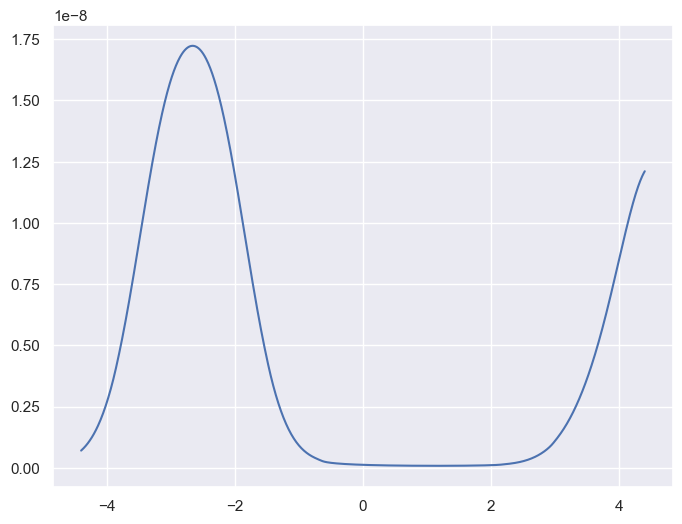

In [40]:
ser.plot()

In [41]:
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(300, center=True, win_type='gaussian').mean(std=0.500/delta).dropna()

<AxesSubplot: >

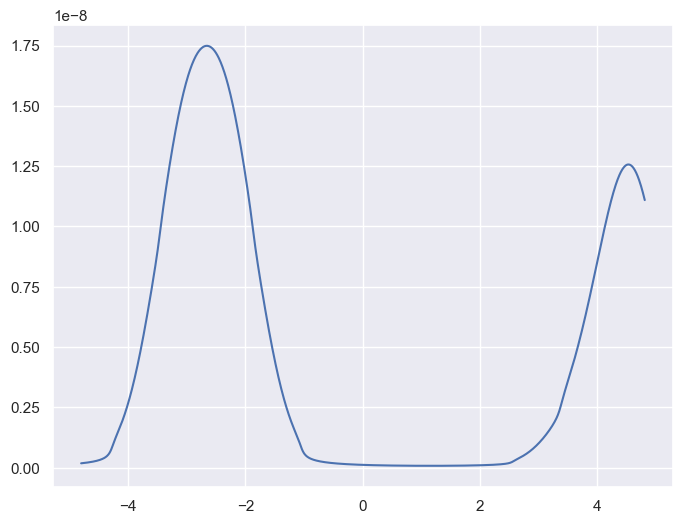

In [42]:
ser.plot()

<AxesSubplot: >

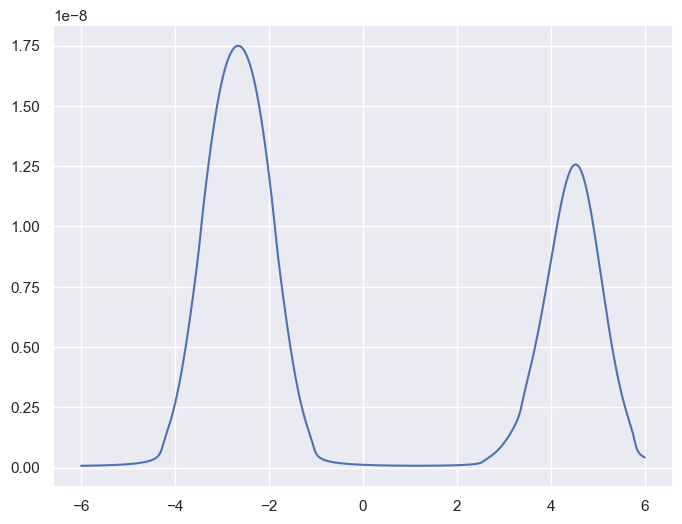

In [43]:
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(300, center=True, win_type='gaussian',min_periods=50).mean(std=0.500/delta).dropna()
ser.plot()

<AxesSubplot: >

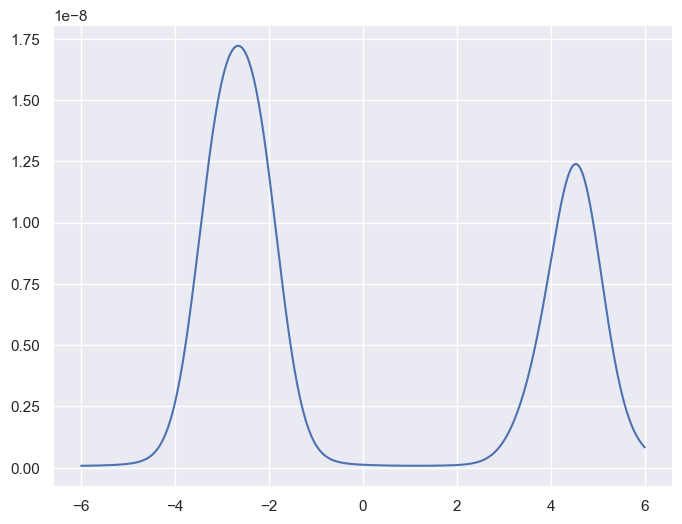

In [44]:
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(500, center=True, win_type='gaussian',min_periods=50).mean(std=0.500/delta).dropna()
ser.plot()

Text(0.5, 0, 'Laser Detuning (GHz)')

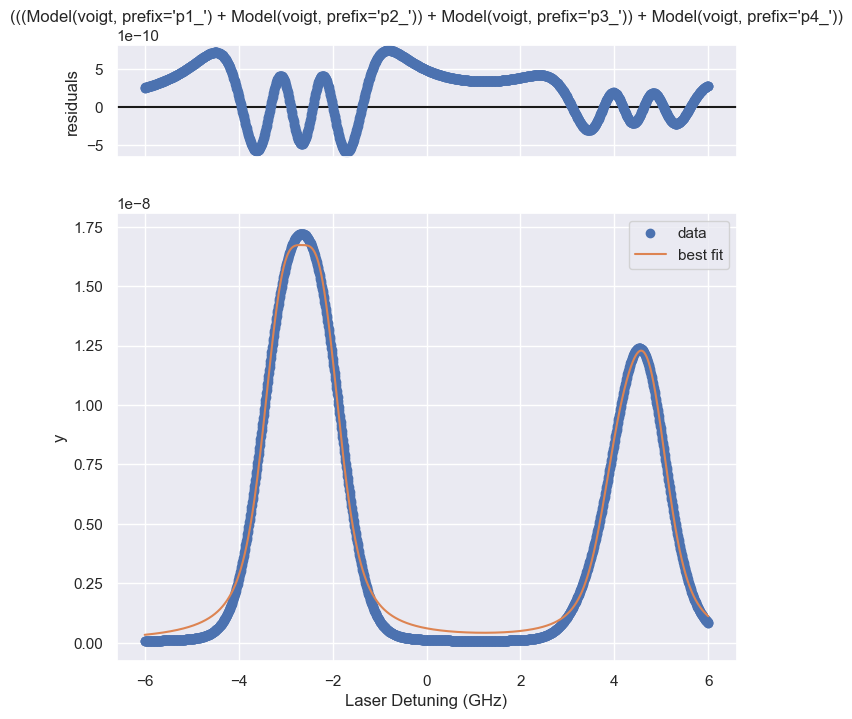

In [45]:
y = ser.dropna()
from lmfit.models import VoigtModel
mod = VoigtModel(prefix="p1_")+VoigtModel(prefix="p2_")+VoigtModel(prefix="p3_")+VoigtModel(prefix="p4_") #+ ConstantModel()
pars = mod.make_params()
for par in pars.keys():
    p = par.split("_")[1]
    if p=="amplitude":
        pars[par].set(value=1.6183e-08)
    elif p=="sigma":
        pars[par].set(value=0.05800174)

pars["p1_center"].set(value=-3.07192801)
pars["p2_center"].set(value=-2.21)
pars["p3_center"].set(value=3.77)
pars["p4_center"].set(value=4.6)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")

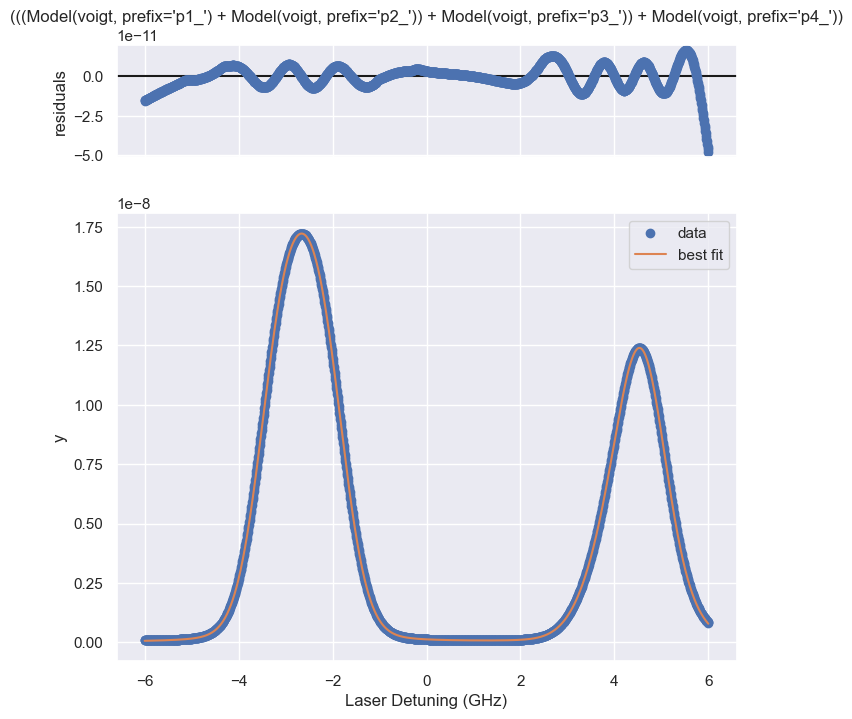

In [46]:
import copy
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True)

res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy(), method="nelder")
res1.plot();
plt.xlabel("Laser Detuning (GHz)")
res1

In [47]:
1

1

In [48]:
ser = ser.rolling(100, center=True, win_type='gaussian').mean(std=(0.500/(2*(2*np.log(2))**0.5)) /delta).dropna()


<AxesSubplot: >

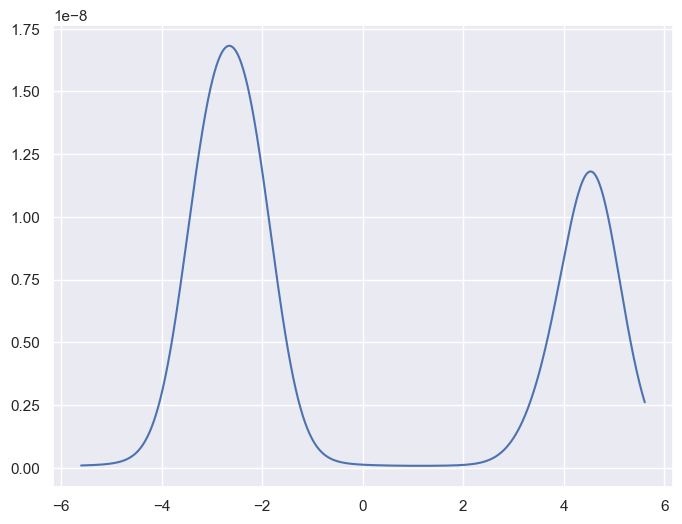

In [49]:
ser.plot()

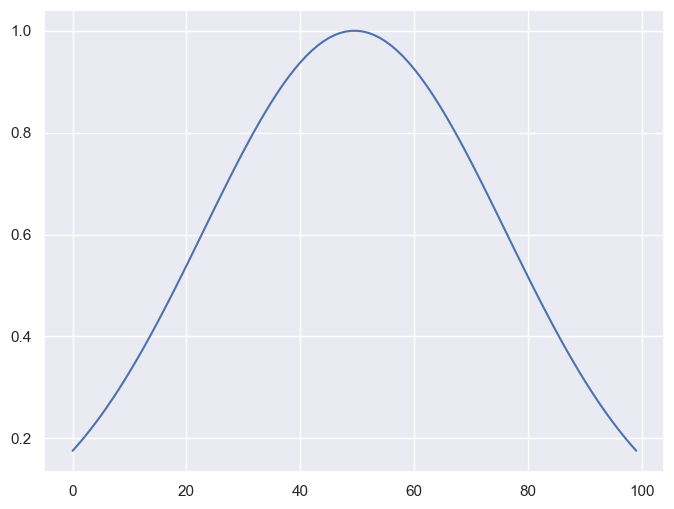

In [50]:
plt.plot(scipy.signal.windows.gaussian(100, (0.500/(2*(2*np.log(2))**0.5)) /delta))

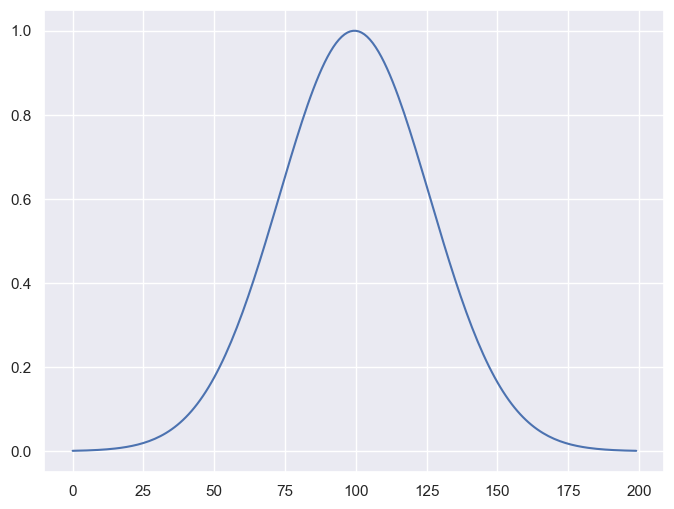

In [51]:
plt.plot(scipy.signal.windows.gaussian(200, (0.500/(2*(2*np.log(2))**0.5)) /delta))

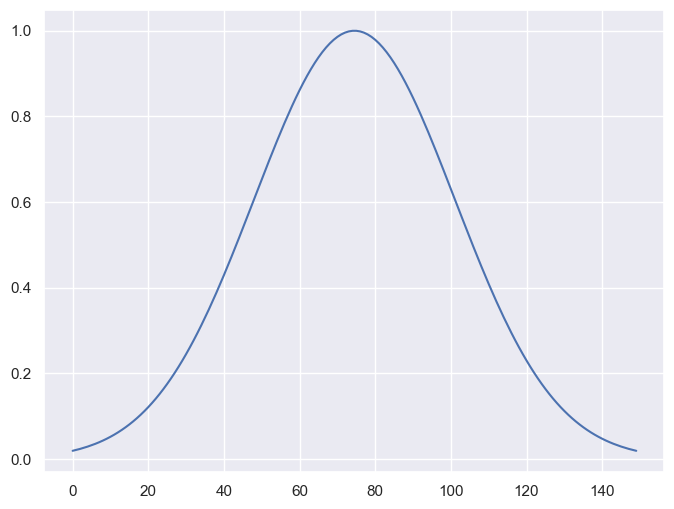

In [52]:
plt.plot(scipy.signal.windows.gaussian(150, (0.500/(2*(2*np.log(2))**0.5)) /delta))

<AxesSubplot: >

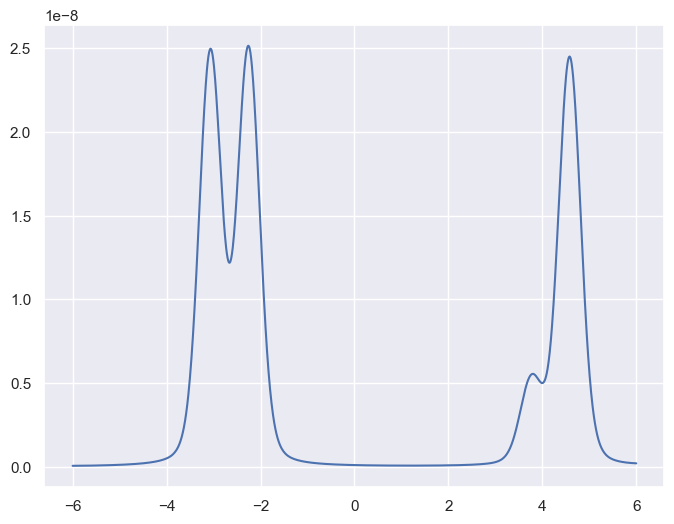

In [53]:
ser = pd.Series(excited_pops)
ser.index = freqs
delta = (freqs[-1] - freqs[0]) / len(freqs)
ser = ser.rolling(200, center=True, win_type='gaussian',min_periods=50).mean(std=(0.500/(2*(2*np.log(2))**0.5)) /delta).dropna()
ser.plot()

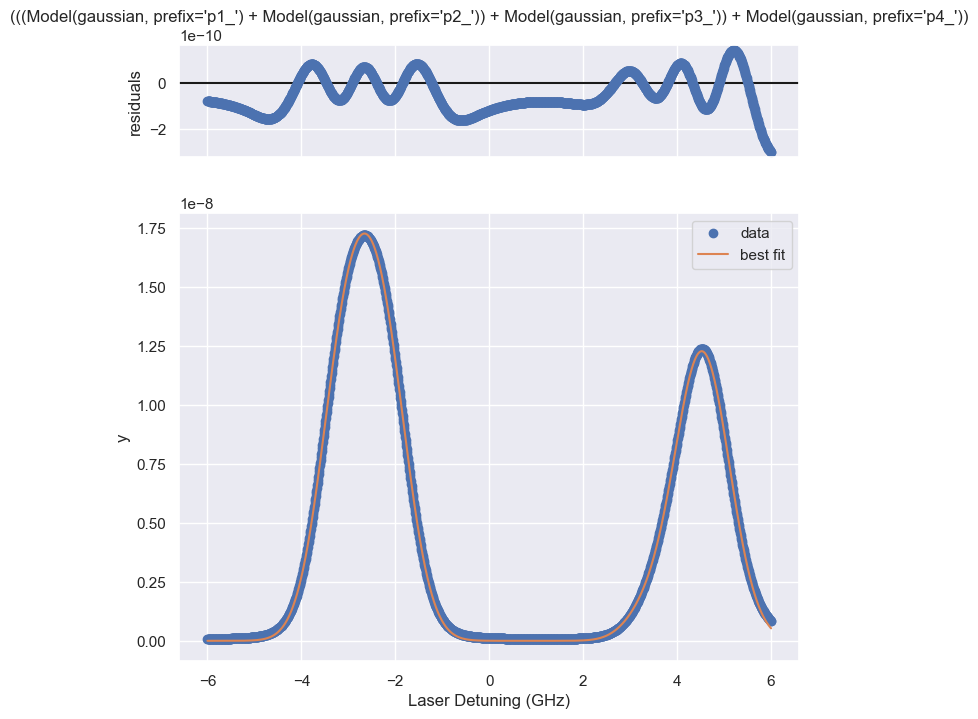

In [54]:
from lmfit.models import GaussianModel
mod = GaussianModel(prefix="p1_")+GaussianModel(prefix="p2_")+GaussianModel(prefix="p3_")+GaussianModel(prefix="p4_") #+ ConstantModel()
pars = mod.make_params()
for par in pars.keys():
    p = par.split("_")[1]
    if p=="amplitude":
        pars[par].set(value=1.6183e-08)
    elif p=="sigma":
        pars[par].set(value=0.5800174)

pars["p1_center"].set(value=-3.07192801)
pars["p2_center"].set(value=-2.21)
pars["p3_center"].set(value=3.77)
pars["p4_center"].set(value=4.6)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")
res
# %%

In [55]:
1

1

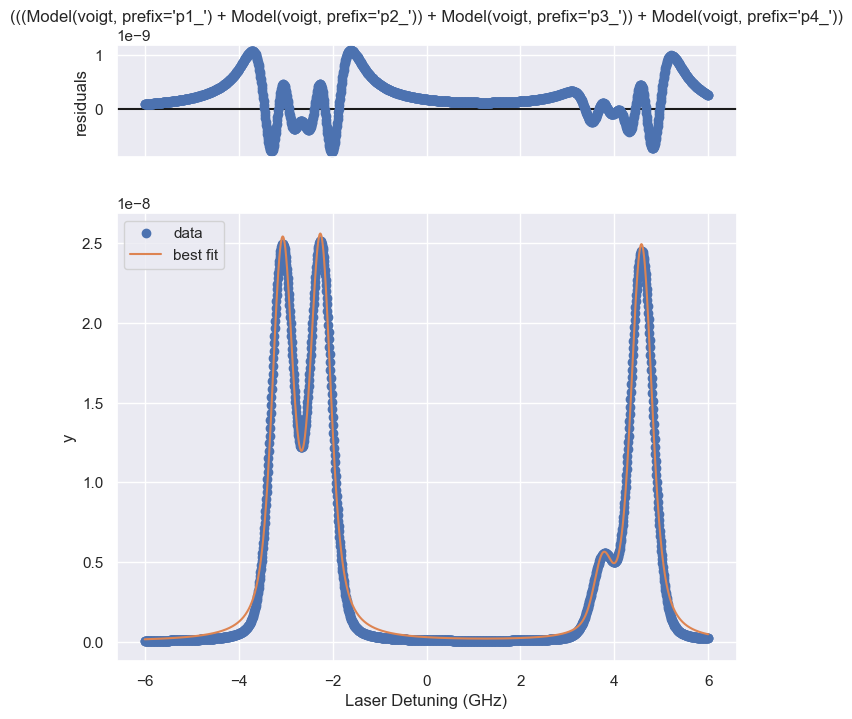

In [56]:
y = ser.dropna()
from lmfit.models import VoigtModel
mod = VoigtModel(prefix="p1_")+VoigtModel(prefix="p2_")+VoigtModel(prefix="p3_")+VoigtModel(prefix="p4_") #+ ConstantModel()
pars = mod.make_params()
for par in pars.keys():
    p = par.split("_")[1]
    if p=="amplitude":
        pars[par].set(value=1.6183e-08)
    elif p=="sigma":
        pars[par].set(value=0.05800174)
pars["p1_center"].set(value=-3.07192801)
pars["p2_center"].set(value=-2.21)
pars["p3_center"].set(value=3.77)
pars["p4_center"].set(value=4.6)
res = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res.plot();
plt.xlabel("Laser Detuning (GHz)")
res

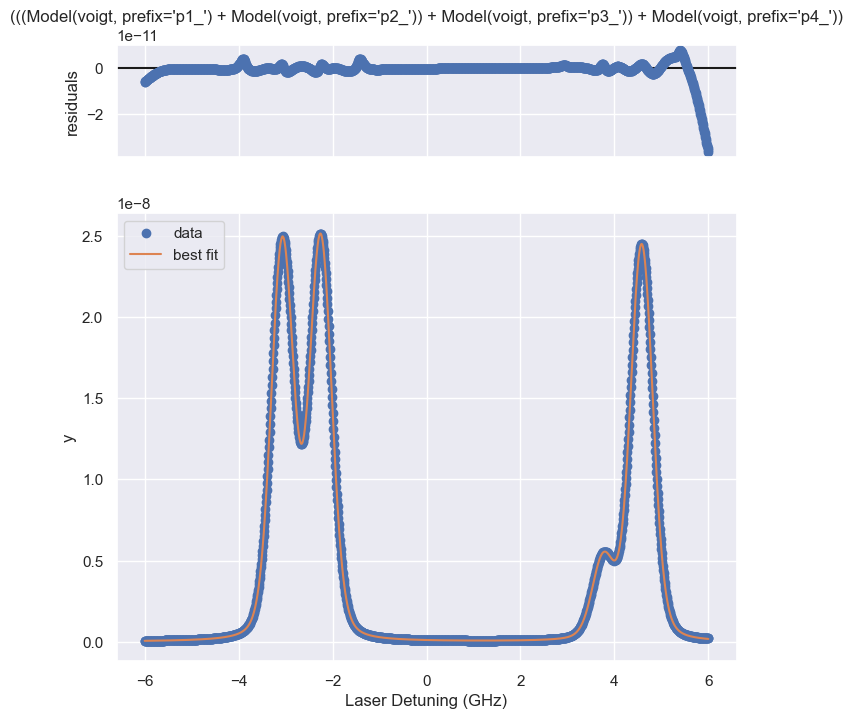

In [57]:
import copy
pars = copy.copy(res.params)
for par in pars:
    p = par.split("_")[1]
    if p=="gamma":
        pars[par].set(vary=True)
res1 = mod.fit(data=y.to_numpy(), params=pars, x=y.index.to_numpy())
res1.plot();
plt.xlabel("Laser Detuning (GHz)")
res1